In [3]:
!git clone https://github.com/ultralytics/yolov5.git

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [4]:
from git import Repo
Repo.clone_from("https://github.com/ultralytics/yolov5.git", "/path/to/clone/yolov5")


ModuleNotFoundError: No module named 'git'

In [15]:
!pip install GitPython
from git import Repo
Repo.clone_from(https://github.com/ultralytics/yolov5)

GitCommandError: Cmd('git') failed due to: exit code(128)
  cmdline: git clone -v -- https://github.com/ultralytics/yolov5.git /path/to/clone/yolov5
  stderr: 'fatal: destination path '/path/to/clone/yolov5' already exists and is not an empty directory.
'

In [16]:
!git clone https://github.com/ultralytics/yolov5
!cd yolov5 & pip install -r requirements.txt

Cloning into 'yolov5'...


In [28]:
import torch
import numpy as np
import cv2
import matplotlib
matplotlib.use('Agg')  # Use a non-interactive backend

import matplotlib.pyplot as plt

In [18]:
#importing the model from the pytorch machine learning library and using yolo5 which is a small model and easy to work with
#pytorch is similar to sklearn which is also a ml library only difference is that in that we import the train test split model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\lenovo/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-11-2 Python-3.12.4 torch-2.5.1+cu118 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [19]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [20]:
img ='https://media.istockphoto.com/id/148421596/photo/traffic-jam-with-rows-of-cars.jpg?s=612x612&w=0&k=20&c=GeldRtTNo_vMfE7aHxhQY0QoV2DMyzi4LqTOLZL5svc='

In [21]:
print(img)

https://media.istockphoto.com/id/148421596/photo/traffic-jam-with-rows-of-cars.jpg?s=612x612&w=0&k=20&c=GeldRtTNo_vMfE7aHxhQY0QoV2DMyzi4LqTOLZL5svc=


In [22]:
#applying the image on the yolo model which is used for detecting objects in a frame
results=model(img)
results.print()

C:\Users\lenovo/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 408x612 13 cars, 2 trucks, 1 traffic light
Speed: 81.7ms pre-process, 277.3ms inference, 1.0ms NMS per image at shape (1, 3, 448, 640)


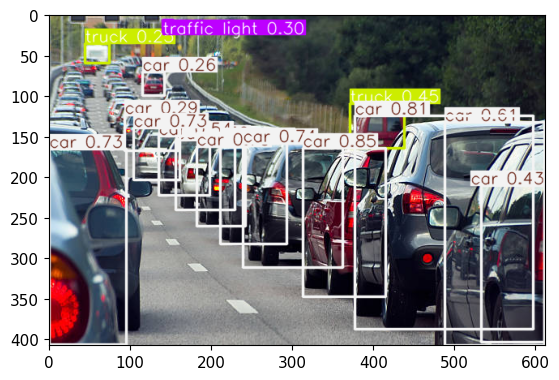

In [23]:
#this is done to show the detection on the image by using the matplotlib and np
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [39]:
#using opencv to access the web cam for drowsiness detction 
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret,frame=cap.read()
    results=model(frame)
    cv2.imshow('YOLO',np.squeeze(results.render()))
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows

C:\Users\lenovo/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\lenovo/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\lenovo/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\lenovo/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\lenovo/.cache\torch\hub\ultralytics_yolov5_master\m

<function destroyAllWindows>

In [32]:
import uuid #used to name the images
import os #helps to work with files easier and helps in joining the files and do some other stuff
import time
import cv2

In [25]:
images_path = os.path.abspath(os.path.join('yolov5', 'datas', 'image'))
 #its a file path to store he data and the images
labels=['awake','drowsy'] #the labels for the images
number_imgs=20 # number of images to be collected
#basically we are gonna loop throught he awake/drowsy loop and get 20 images first for awake and then 20 images for drowsy for the model to be trained on that kind of data

In [15]:
cap = cv2.VideoCapture(0)
#loop through labels
for label in labels:
    print('collecting images for {}'.format(labels))
    time.sleep(5)
    #loop through image range
    for image in range(number_imgs):
        print('collecting images for {},image number {}'.format(label,image))
        ret,frame = cap.read()
        #naming the image path
        imgname = os.path.join(images_path,label+'.'+str(uuid.uuid1())+'.jpg')
        #writes out image to file
        cv2.imwrite(imgname,frame)
        #render to the screen
        cv2.imshow('image collection',frame)
        time.sleep(2)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows
        
        

collecting images for ['awake', 'drowsy']
collecting images for awake,image number 0
collecting images for awake,image number 1
collecting images for awake,image number 2
collecting images for awake,image number 3
collecting images for awake,image number 4
collecting images for awake,image number 5
collecting images for awake,image number 6
collecting images for awake,image number 7
collecting images for awake,image number 8
collecting images for awake,image number 9
collecting images for awake,image number 10
collecting images for awake,image number 11
collecting images for awake,image number 12
collecting images for awake,image number 13
collecting images for awake,image number 14
collecting images for awake,image number 15
collecting images for awake,image number 16
collecting images for awake,image number 17
collecting images for awake,image number 18
collecting images for awake,image number 19
collecting images for ['awake', 'drowsy']
collecting images for drowsy,image number 0
co

<function destroyAllWindows>

In [12]:
for label in labels:
    print(label)

awake
drowsy


In [36]:
os.makedirs(images_path, exist_ok=True)

# Initialize the camera
cap = cv2.VideoCapture(0)

# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through the specified number of images
    for image in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, image))
        ret, frame = cap.read()
        
        # Check if frame capture was successful
        if not ret:
            print("Failed to capture image")
            continue
        
        # Define the image path with unique name
        imgname = os.path.join(images_path, f"{label}.{str(uuid.uuid1())}.jpg")
        
        # Write the image to file
        cv2.imwrite(imgname, frame)
        
        # Show the image on screen
        cv2.imshow('Image Collection', frame)
        time.sleep(2)
        
        # Check if 'q' is pressed to exit
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

# Release the camera and close windows
cap.release()
cv2.destroyAllWindows()

In [ ]:
# Create the directory if it doesn’t exist
os.makedirs(images_path, exist_ok=True)

# Initialize the camera
cap = cv2.VideoCapture(0)

# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through the specified number of images
    for image in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, image))
        ret, frame = cap.read()
        
        # Check if frame capture was successful
        if not ret:
            print("Failed to capture image")
            continue
        
        # Define the image path with unique name
        imgname = os.path.join(images_path, f"{label}.{str(uuid.uuid1())}.jpg")
        print(f"Saving image to: {imgname}")  # Debugging statement

        # Write the image to file
        cv2.imwrite(imgname, frame)
        
        # Check if the image was actually saved
        if not os.path.exists(imgname):
            print(f"Error: Image not saved to {imgname}")
        else:
            print(f"Image saved successfully to {imgname}")
        
        # Show the image on screen
        cv2.imshow('Image Collection', frame)
        time.sleep(2)
        
        # Check if 'q' is pressed to exit
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

# Release the camera and close windows
cap.release()
cv2.destroyAllWindows

Saving image to: C:\Users\lenovo\yolov5\datas\image\awake.b5689b0e-9912-11ef-a7d2-f3e1905241b9.jpg
Image saved successfully to C:\Users\lenovo\yolov5\datas\image\awake.b5689b0e-9912-11ef-a7d2-f3e1905241b9.jpg
Saving image to: C:\Users\lenovo\yolov5\datas\image\awake.b6a006b6-9912-11ef-acbe-f3e1905241b9.jpg
Image saved successfully to C:\Users\lenovo\yolov5\datas\image\awake.b6a006b6-9912-11ef-acbe-f3e1905241b9.jpg
Saving image to: C:\Users\lenovo\yolov5\datas\image\awake.b7db16d2-9912-11ef-b2ae-f3e1905241b9.jpg
Image saved successfully to C:\Users\lenovo\yolov5\datas\image\awake.b7db16d2-9912-11ef-b2ae-f3e1905241b9.jpg
Saving image to: C:\Users\lenovo\yolov5\datas\image\awake.b9141e3c-9912-11ef-b4bd-f3e1905241b9.jpg
Image saved successfully to C:\Users\lenovo\yolov5\datas\image\awake.b9141e3c-9912-11ef-b4bd-f3e1905241b9.jpg
Saving image to: C:\Users\lenovo\yolov5\datas\image\awake.ba4baa3a-9912-11ef-8253-f3e1905241b9.jpg
Image saved successfully to C:\Users\lenovo\yolov5\datas\image\aw

In [12]:
!git clone https://github.com/HumanSignal/labelImg

Cloning into 'labelImg'...


In [13]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc


C:\Users\lenovo\yolov5\datas\image


In [10]:
import os
import json

# Define your paths
labelme_folder = r'C:\Users\lenovo\Desktop\yolov5\datas\labels'  # Update this path to your labelme folder
output_folder = r'C:\Users\lenovo\Desktop\yolov5\datas\yolo_labels'  # Path where YOLO format files will be saved

# Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Mapping of labels (update these labels as per your LabelMe project)
label_map = {
    'awake': 0,
    'drowsy': 1
}

# Loop through the .json files in the labelme folder
for json_file in os.listdir(labelme_folder):
    if json_file.endswith('.json'):
        with open(os.path.join(labelme_folder, json_file)) as f:
            data = json.load(f)

        # Get the width and height of the image
        image_width = data['imageWidth']
        image_height = data['imageHeight']

        # Prepare the output file
        output_file = os.path.join(output_folder, json_file.replace('.json', '.txt'))

        with open(output_file, 'w') as out_f:
            for shape in data['shapes']:
                label = shape['label']
                points = shape['points']

                # Calculate the center, width, and height for YOLO format
                x_center = (points[0][0] + points[1][0]) / 2 / image_width
                y_center = (points[0][1] + points[1][1]) / 2 / image_height
                width = abs(points[1][0] - points[0][0]) / image_width
                height = abs(points[1][1] - points[0][1]) / image_height

                # Write to the output file
                class_id = label_map[label]
                out_f.write(f"{class_id} {x_center} {y_center} {width} {height}\n")

        print(f"Converted {json_file} to YOLO format: {output_file}")


Converted awake.36080d6e-9913-11ef-a1d3-f3e1905241b9.json to YOLO format: C:\Users\lenovo\Desktop\yolov5\datas\yolo_labels\awake.36080d6e-9913-11ef-a1d3-f3e1905241b9.txt
Converted awake.373ef8f9-9913-11ef-ad76-f3e1905241b9.json to YOLO format: C:\Users\lenovo\Desktop\yolov5\datas\yolo_labels\awake.373ef8f9-9913-11ef-ad76-f3e1905241b9.txt
Converted awake.38777d51-9913-11ef-9239-f3e1905241b9.json to YOLO format: C:\Users\lenovo\Desktop\yolov5\datas\yolo_labels\awake.38777d51-9913-11ef-9239-f3e1905241b9.txt
Converted awake.39af2e18-9913-11ef-87da-f3e1905241b9.json to YOLO format: C:\Users\lenovo\Desktop\yolov5\datas\yolo_labels\awake.39af2e18-9913-11ef-87da-f3e1905241b9.txt
Converted awake.3ae9b839-9913-11ef-a52d-f3e1905241b9.json to YOLO format: C:\Users\lenovo\Desktop\yolov5\datas\yolo_labels\awake.3ae9b839-9913-11ef-a52d-f3e1905241b9.txt
Converted awake.3c22cfcf-9913-11ef-8854-f3e1905241b9.json to YOLO format: C:\Users\lenovo\Desktop\yolov5\datas\yolo_labels\awake.3c22cfcf-9913-11ef-88

In [11]:
python convert_labelme_to_yolo.py


SyntaxError: invalid syntax (2904120022.py, line 1)

In [11]:
#to convert 
import os
import json

# Define paths for your LabelMe and YOLO output directories
labelme_folder = r'C:\Users\lenovo\Desktop\yolov5\datas\labels'  # Change this to your actual path
output_folder = r'C:\Users\lenovo\Desktop\yolov5\datas\yolo_labels'  # Path for YOLO formatted files

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Mapping of label names to YOLO class IDs (update these as needed)
label_map = {
    'awake': 0,
    'drowsy': 1,
}

# Process each .json file in the LabelMe folder
for json_file in os.listdir(labelme_folder):
    if json_file.endswith('.json'):
        with open(os.path.join(labelme_folder, json_file)) as f:
            data = json.load(f)

        # Get image dimensions
        image_width = data['imageWidth']
        image_height = data['imageHeight']

        # Prepare the corresponding YOLO output file
        output_file = os.path.join(output_folder, json_file.replace('.json', '.txt'))

        with open(output_file, 'w') as out_f:
            for shape in data['shapes']:
                label = shape['label']
                points = shape['points']

                # Calculate YOLO format coordinates
                x_center = (points[0][0] + points[1][0]) / 2 / image_width
                y_center = (points[0][1] + points[1][1]) / 2 / image_height
                width = abs(points[1][0] - points[0][0]) / image_width
                height = abs(points[1][1] - points[0][1]) / image_height

                # Write to output file in YOLO format
                class_id = label_map[label]
                out_f.write(f"{class_id} {x_center} {y_center} {width} {height}\n")

        print(f"Converted {json_file} to YOLO format: {output_file}")

Converted awake.36080d6e-9913-11ef-a1d3-f3e1905241b9.json to YOLO format: C:\Users\lenovo\Desktop\yolov5\datas\yolo_labels\awake.36080d6e-9913-11ef-a1d3-f3e1905241b9.txt
Converted awake.373ef8f9-9913-11ef-ad76-f3e1905241b9.json to YOLO format: C:\Users\lenovo\Desktop\yolov5\datas\yolo_labels\awake.373ef8f9-9913-11ef-ad76-f3e1905241b9.txt
Converted awake.38777d51-9913-11ef-9239-f3e1905241b9.json to YOLO format: C:\Users\lenovo\Desktop\yolov5\datas\yolo_labels\awake.38777d51-9913-11ef-9239-f3e1905241b9.txt
Converted awake.39af2e18-9913-11ef-87da-f3e1905241b9.json to YOLO format: C:\Users\lenovo\Desktop\yolov5\datas\yolo_labels\awake.39af2e18-9913-11ef-87da-f3e1905241b9.txt
Converted awake.3ae9b839-9913-11ef-a52d-f3e1905241b9.json to YOLO format: C:\Users\lenovo\Desktop\yolov5\datas\yolo_labels\awake.3ae9b839-9913-11ef-a52d-f3e1905241b9.txt
Converted awake.3c22cfcf-9913-11ef-8854-f3e1905241b9.json to YOLO format: C:\Users\lenovo\Desktop\yolov5\datas\yolo_labels\awake.3c22cfcf-9913-11ef-88

python: can't open file 'C:\\Users\\lenovo\\train.py': [Errno 2] No such file or directory


Traceback (most recent call last):
  File "C:\Users\lenovo\Desktop\yolov5\train.py", line 47, in <module>
    import val as validate  # for end-of-epoch mAP
  File "C:\Users\lenovo\Desktop\yolov5\val.py", line 39, in <module>
    from models.common import DetectMultiBackend
  File "C:\Users\lenovo\Desktop\yolov5\models\common.py", line 27, in <module>
    import ultralytics
  File "C:\Users\lenovo\minicond\lib\site-packages\ultralytics\__init__.py", line 11, in <module>
    from ultralytics.models import NAS, RTDETR, SAM, YOLO, FastSAM, YOLOWorld
  File "C:\Users\lenovo\minicond\lib\site-packages\ultralytics\models\__init__.py", line 3, in <module>
    from .fastsam import FastSAM
  File "C:\Users\lenovo\minicond\lib\site-packages\ultralytics\models\fastsam\__init__.py", line 3, in <module>
    from .model import FastSAM
  File "C:\Users\lenovo\minicond\lib\site-packages\ultralytics\models\fastsam\model.py", line 5, in <module>
    from ultralytics.engine.model import Model
  File "C:\

In [26]:
import os
import xml.etree.ElementTree as ET

# Define paths
pascal_voc_path = 'C:\\Users\\lenovo\\Desktop\\yolov5\\datas\\labels'  # Path to your Pascal VOC labels
yolo_labels_path = 'C:\\Users\\lenovo\\Desktop\\yolov5\\datas\\yolo_labels'  # Path to save YOLO labels

# Ensure YOLO labels directory exists
os.makedirs(yolo_labels_path, exist_ok=True)

# Define your class names
class_names = ['awake', 'drowsy']  # Update this list according to your classes

# Function to convert VOC to YOLO format
def convert_voc_to_yolo(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()

    # Get image dimensions
    width = int(root.find('size/width').text)
    height = int(root.find('size/height').text)

    yolo_data = []

    for member in root.findall('object'):
        class_name = member.find('name').text
        if class_name in class_names:
            class_id = class_names.index(class_name)
            xmlbox = member.find('bndbox')
            b = (int(xmlbox.find('xmin').text), int(xmlbox.find('xmax').text),
                  int(xmlbox.find('ymin').text), int(xmlbox.find('ymax').text))
            
            # Convert Pascal VOC coordinates to YOLO format
            x_center = (b[0] + b[1]) / 2 / width
            y_center = (b[2] + b[3]) / 2 / height
            obj_width = (b[1] - b[0]) / width
            obj_height = (b[3] - b[2]) / height
            
            # Append to YOLO data
            yolo_data.append(f"{class_id} {x_center} {y_center} {obj_width} {obj_height}")

    return yolo_data

# Iterate through all XML files in the labels directory
for xml_file in os.listdir(pascal_voc_path):
    if xml_file.endswith('.xml'):
        full_xml_path = os.path.join(pascal_voc_path, xml_file)
        yolo_data = convert_voc_to_yolo(full_xml_path)
        # Save to YOLO format
        base_filename = os.path.splitext(xml_file)[0]
        with open(os.path.join(yolo_labels_path, f"{base_filename}.txt"), 'w') as f:
            for line in yolo_data:
                f.write(line + '\n')

print("Conversion completed!")


Conversion completed!


In [33]:
os.chdir('yolov5')
!python train.py --img 320 --batch 16 --epochs 5 --data dataset.yaml --weights yolov5s.pt

FileNotFoundError: [WinError 2] The system cannot find the file specified: 'yolov5'

In [45]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 5 --data dataset.yaml --weights yolov5s.p

The system cannot find the path specified.


In [46]:

import os

for root, dirs, files in os.walk('.'):
    for file in files:
        print(os.path.join(root, file))




.\.dockerignore
.\.gitattributes
.\.gitignore
.\benchmarks.py
.\CITATION.cff
.\CONTRIBUTING.md
.\dataset.yaml
.\detect.py
.\export.py
.\hubconf.py
.\LICENSE
.\pyproject.toml
.\README.md
.\README.zh-CN.md
.\requirements.txt
.\train.py
.\tutorial.ipynb
.\val.py
.\.git\config
.\.git\description
.\.git\FETCH_HEAD
.\.git\HEAD
.\.git\index
.\.git\packed-refs
.\.git\hooks\applypatch-msg.sample
.\.git\hooks\commit-msg.sample
.\.git\hooks\fsmonitor-watchman.sample
.\.git\hooks\post-update.sample
.\.git\hooks\pre-applypatch.sample
.\.git\hooks\pre-commit.sample
.\.git\hooks\pre-merge-commit.sample
.\.git\hooks\pre-push.sample
.\.git\hooks\pre-rebase.sample
.\.git\hooks\pre-receive.sample
.\.git\hooks\prepare-commit-msg.sample
.\.git\hooks\push-to-checkout.sample
.\.git\hooks\sendemail-validate.sample
.\.git\hooks\update.sample
.\.git\info\exclude
.\.git\logs\HEAD
.\.git\logs\refs\heads\master
.\.git\logs\refs\remotes\origin\HEAD
.\.git\objects\pack\pack-0d424889c830d09b38a0033b3c844a5c98e299e8.i

In [41]:
!pwd


'pwd' is not recognized as an internal or external command,
operable program or batch file.


In [50]:
!cd "C:/Users/lenovo/yolov5" && python train.py --img 320 --batch 16 --epochs 5 --data dataset.yaml --weights yolov5s.pt

Traceback (most recent call last):
  File "C:\Users\lenovo\yolov5\train.py", line 47, in <module>
    import val as validate  # for end-of-epoch mAP
  File "C:\Users\lenovo\yolov5\val.py", line 39, in <module>
    from models.common import DetectMultiBackend
  File "C:\Users\lenovo\yolov5\models\common.py", line 27, in <module>
    import ultralytics
  File "C:\Users\lenovo\minicond\lib\site-packages\ultralytics\__init__.py", line 11, in <module>
    from ultralytics.models import NAS, RTDETR, SAM, YOLO, FastSAM, YOLOWorld
  File "C:\Users\lenovo\minicond\lib\site-packages\ultralytics\models\__init__.py", line 3, in <module>
    from .fastsam import FastSAM
  File "C:\Users\lenovo\minicond\lib\site-packages\ultralytics\models\fastsam\__init__.py", line 3, in <module>
    from .model import FastSAM
  File "C:\Users\lenovo\minicond\lib\site-packages\ultralytics\models\fastsam\model.py", line 5, in <module>
    from ultralytics.engine.model import Model
  File "C:\Users\lenovo\minicond\li